In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Sklearn as PRS for specific SNPs

In [2]:
df_merged = pd.read_csv('E:\Mathias\with_comorb2.csv')

In [3]:
df_merged

,eid,age,hypertension,sex,BMI,cancer,anysmoker,Heart_failure
0,1000017,49.0,2,1.0,29.8256,1,1,1
1,1000025,41.0,1,0.0,23.2930,1,1,1
2,1000038,62.0,1,0.0,18.5901,1,1,1
3,1000042,69.0,1,1.0,29.3306,1,2,1
4,1000056,56.0,1,1.0,28.3253,1,1,1
...,...,...,...,...,...,...,...,...
502500,6025014,64.0,1,1.0,25.1797,1,1,1
502501,6025021,68.0,2,1.0,33.8222,1,2,1
502502,6025039,55.0,1,1.0,25.7999,1,1,1
502503,6025043,60.0,1,1.0,28.4877,1,1,1


In [4]:
df_afli = pd.read_csv(r'E:/Mathias/phenotypes/afib_all_pheno.txt', delimiter = '\t', header = None)
df_afli.rename(columns={1: 'eid', 2: 'phenotype'}, inplace=True)
df_afli.drop(columns=[0], inplace=True)
df_afli = df_afli.merge(df_merged, on='eid', how='left')
df_afli

,eid,phenotype,age,hypertension,sex,BMI,cancer,anysmoker,Heart_failure
0,1000017,1,49.0,2,1.0,29.8256,1,1,1
1,1000025,1,41.0,1,0.0,23.2930,1,1,1
2,1000038,1,62.0,1,0.0,18.5901,1,1,1
3,1000042,1,69.0,1,1.0,29.3306,1,2,1
4,1000056,1,56.0,1,1.0,28.3253,1,1,1
...,...,...,...,...,...,...,...,...,...
502500,6025014,1,64.0,1,1.0,25.1797,1,1,1
502501,6025021,1,68.0,2,1.0,33.8222,1,2,1
502502,6025039,2,55.0,1,1.0,25.7999,1,1,1
502503,6025043,1,60.0,1,1.0,28.4877,1,1,1


# Load genetic data

In [5]:
df_genetic = pd.read_csv('E:\Mathias\\AF\\relevant_snps_afib.csv')

In [6]:
df_genetic
df_genetic.rename(columns={'FID': 'eid'}, inplace=True)
#df_genetic.drop(columns={'IID', 'Unnamed: 0', 'PAT', 'MAT', 'SEX', 'PHENOTYPE'}, inplace=True)
df_afli = df_afli.merge(df_genetic, on='eid', how='left')
#df_afli.drop(columns=['Unnamed: 0', 'Obesity_date', 'HF_date', 'pillage', 'warfarin'], inplace=True)
df_afli['phenotype'] = df_afli['phenotype'].replace([1], 0)
df_afli['phenotype'] = df_afli['phenotype'].replace([2], 1)
df_afli

,eid,phenotype,age,hypertension,sex,BMI,cancer,anysmoker,Heart_failure,Unnamed: 0,...,rs7164883_G,rs11630367_G,rs1858801_T,rs62053234_T,rs2106261_T,rs879324_A,rs9940321_A,rs61164185_A,rs9930504_T,rs1183967_T
0,1000017,0,49.0,2,1.0,29.8256,1,1,1,1.0,...,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1000025,0,41.0,1,0.0,23.2930,1,1,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000038,0,62.0,1,0.0,18.5901,1,1,1,3.0,...,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1000042,0,69.0,1,1.0,29.3306,1,2,1,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000056,0,56.0,1,1.0,28.3253,1,1,1,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502500,6025014,0,64.0,1,1.0,25.1797,1,1,1,446177.0,...,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
502501,6025021,0,68.0,2,1.0,33.8222,1,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502502,6025039,1,55.0,1,1.0,25.7999,1,1,1,446178.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502503,6025043,0,60.0,1,1.0,28.4877,1,1,1,446179.0,...,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0


In [7]:
df_qc = pd.read_csv('E:\\Data\\UkBiobank\\ukb_10.fam', sep = " ", header = None)
df_qc['eid'] = df_qc[[0]]
df_qc = df_qc[['eid']]
df_afli = df_afli.merge(df_qc, on='eid', how='right')
df_afli

,eid,phenotype,age,hypertension,sex,BMI,cancer,anysmoker,Heart_failure,Unnamed: 0,...,rs7164883_G,rs11630367_G,rs1858801_T,rs62053234_T,rs2106261_T,rs879324_A,rs9940321_A,rs61164185_A,rs9930504_T,rs1183967_T
0,1000017,0,49.0,2,1.0,29.8256,1,1,1,1.0,...,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1000025,0,41.0,1,0.0,23.2930,1,1,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000038,0,62.0,1,0.0,18.5901,1,1,1,3.0,...,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1000042,0,69.0,1,1.0,29.3306,1,2,1,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000056,0,56.0,1,1.0,28.3253,1,1,1,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446175,6025006,0,58.0,2,1.0,36.1332,1,2,1,446176.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
446176,6025014,0,64.0,1,1.0,25.1797,1,1,1,446177.0,...,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
446177,6025039,1,55.0,1,1.0,25.7999,1,1,1,446178.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446178,6025043,0,60.0,1,1.0,28.4877,1,1,1,446179.0,...,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0


In [8]:
#df_afli.drop(['Obesity', 'Heart_failure', 'diabetess', 'contraceptive', 'anysmoker', 'anysmoker', 'cancer',
             #'age', 'sex'], axis = 1, inplace = True)
df_afli = df_afli[['eid', 'phenotype', 'age', 'hypertension', 'sex', 'BMI', 'cancer', 'anysmoker', 'Heart_failure']]

# Split into train/test from EIR

Get in train and test sets for afib and merge with above cohort

In [9]:
df_test = pd.read_csv(r'E:\Mathias\phenotypes\test_ids_afib_v2.txt', header=None)
df_train = pd.read_csv(r'E:\Mathias\phenotypes\training_ids_afib_v2.txt', header=None)

In [10]:
df_test['eid'] = df_test[[0]]
df_train['eid'] = df_train[[0]]
df_test = df_test[['eid']]
df_train = df_train[['eid']]
df_afli_train = df_afli.merge(df_train, on='eid', how='right')
df_afli_test = df_afli.merge(df_test, on='eid', how='right')
df_afli_test

,eid,phenotype,age,hypertension,sex,BMI,cancer,anysmoker,Heart_failure
0,1000634,0,51.0,1,1.0,35.2670,1,1,1
1,1001312,0,46.0,1,0.0,27.5701,1,1,1
2,1001398,0,62.0,1,1.0,29.0360,1,2,1
3,1001431,0,60.0,1,0.0,24.8047,1,1,1
4,1001632,0,67.0,2,0.0,25.5183,1,1,1
...,...,...,...,...,...,...,...,...,...
28834,6024475,0,60.0,1,1.0,30.8813,1,1,1
28835,6024517,0,50.0,1,1.0,23.7510,1,1,1
28836,6024525,0,56.0,1,0.0,23.3958,1,2,1
28837,6024668,0,55.0,1,0.0,26.6367,1,1,1


# Logistic regression

In [11]:
#Eliminate NaN
df_afli_train.fillna(method = 'ffill', inplace = True)

#split dataset in features and target variable
feature_cols_train = df_afli_train.iloc[:, 2:289]
target_cols_train = df_afli_train['phenotype']
X_train = feature_cols_train # Features
y_train = target_cols_train # Target variable

#Eliminate NaN
df_afli_test.fillna(method = 'ffill', inplace = True)

#split dataset in features and target variable
feature_cols_test = df_afli_test.iloc[:, 2:289]
target_cols_test = df_afli_test['phenotype']
X_test = feature_cols_test # Features
y_test = target_cols_test # Target variable

In [12]:
X_train

,age,hypertension,sex,BMI,cancer,anysmoker,Heart_failure
0,62.0,1,0.0,18.5901,1,1,1
1,69.0,1,1.0,29.3306,1,2,1
2,56.0,1,1.0,28.3253,1,1,1
3,60.0,2,1.0,26.5338,1,1,1
4,42.0,1,1.0,23.8572,1,1,1
...,...,...,...,...,...,...,...
417336,44.0,1,1.0,27.7991,1,1,1
417337,56.0,1,0.0,32.4501,1,2,1
417338,59.0,1,0.0,20.9392,2,2,1
417339,49.0,1,0.0,27.2150,1,1,1


In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=16)


In [14]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000, solver='liblinear', penalty='l1')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [15]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[26904,   146],
       [ 1627,   162]], dtype=int64)

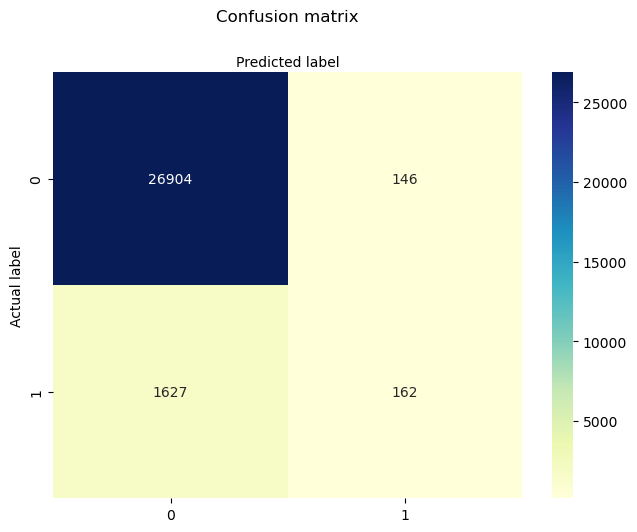

In [16]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show(1)

In [17]:
from sklearn.metrics import classification_report
target_names = ['without afli', 'with afli']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

without afli       0.94      0.99      0.97     27050
   with afli       0.53      0.09      0.15      1789

    accuracy                           0.94     28839
   macro avg       0.73      0.54      0.56     28839
weighted avg       0.92      0.94      0.92     28839



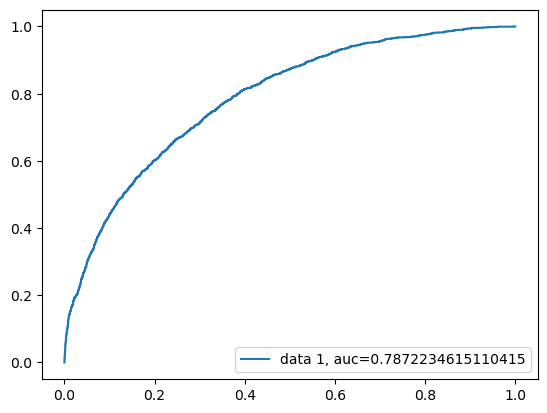

In [18]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Feature importance 

In [19]:
feature_weights = logreg.coef_[0]

In [48]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_weights})

In [49]:
feature_importance = feature_importance.reindex(feature_importance.Importance.abs().sort_values(ascending=False).index)

In [50]:
print(feature_importance)

          Feature  Importance
53   rs17042171_A    0.287239
39   rs16866465_G   -0.279997
78   rs17138767_G   -0.241977
21    rs1009358_C   -0.238395
81   rs11773845_C   -0.224913
..            ...         ...
110  rs35623220_T    0.000969
132   rs1858801_T   -0.000942
6    rs61811879_T   -0.000875
7    rs41264253_A    0.000602
3    rs13376333_T   -0.000007

[140 rows x 2 columns]


In [51]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.177787
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              phenotype   No. Observations:               417341
Model:                          Logit   Df Residuals:                   417201
Method:                           MLE   Df Model:                          139
Date:                Mon, 15 May 2023   Pseudo R-squ.:                0.004501
Time:                        15:53:45   Log-Likelihood:                -74198.
converged:                       True   LL-Null:                       -74533.
Covariance Type:            nonrobust   LLR p-value:                 1.226e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
rs1218598_G          -0.0278      0.015     -1.911      0.056      -0.056       0.001
rs121854

# Results, written

# Bootstrapping

In [20]:
from sklearn.utils import resample

In [21]:
model = LogisticRegression(random_state=16, max_iter=1000, solver='liblinear', penalty='l1')
model.fit(X_train, y_train)
original_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [25]:
n_iterations = 10
roc_aucs = []

In [26]:
for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    
    model.fit(X_resampled, y_resampled)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    roc_aucs.append(auc)
    
lower = np.percentile(roc_aucs, 2.5)
upper = np.percentile(roc_aucs, 97.5)

print(f"Original ROC-AUC: {original_auc:.3f}")
print(f"95% Confidence Interval for ROC-AUC: ({lower:.3f}, {upper:.3f})")

Original ROC-AUC: 0.787
95% Confidence Interval for ROC-AUC: (0.787, 0.787)


In [27]:
original_auc

0.7872234615110415